### Cho dữ liệu Click_prediction_small (link:https://www.openml.org/d/1220 (https://www.openml.org/d/1220) hoặc sklearn.datasets import fetch_openml với data_id = 1220). Yêu cầu: Hãy đọc dữ liệu từ tập tin này, áp dụng Naive Bayes để thực hiện việc xác định người dùng có click vào một quảng cáo hay không dựa trên các thông tin được cung cấp.
### Yêu cầu:
1. Hãy chuẩn hóa dữ liệu cho phù hợp
2. Áp dụng Naive Bayes. Nhận xét kết quả.
3. Model trên có phù hợp không? Nếu không thì đưa ra phương án khác.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
data = fetch_openml(data_id=1220)
X = pd.DataFrame(data['data'], columns=data['feature_names']).astype(float)
y = pd.Series(data['target']).astype(int)

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39948 entries, 0 to 39947
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   impression      39948 non-null  float64
 1   ad_id           39948 non-null  float64
 2   advertiser_id   39948 non-null  float64
 3   depth           39948 non-null  float64
 4   position        39948 non-null  float64
 5   keyword_id      39948 non-null  float64
 6   title_id        39948 non-null  float64
 7   description_id  39948 non-null  float64
 8   user_id         39948 non-null  float64
dtypes: float64(9)
memory usage: 2.7 MB


In [4]:
X.head()

,impression,ad_id,advertiser_id,depth,position,keyword_id,title_id,description_id,user_id
0,1.0,8343295.0,11700.0,3.0,3.0,21264.0,27892.0,1559.0,0.0
1,1.0,20017077.0,23798.0,1.0,1.0,35498.0,4.0,36476.0,562934.0
2,1.0,21348354.0,36654.0,1.0,1.0,19975.0,36105.0,33292.0,11621116.0
3,1.0,20366086.0,33280.0,3.0,3.0,5942.0,4057.0,4390.0,8778348.0
4,1.0,6803526.0,10790.0,2.0,1.0,60593.0,25242.0,1679.0,12118311.0


In [5]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: click, dtype: int32

In [6]:
#target count: 1: click, 0: not click
y.value_counts()

0    33220
1     6728
Name: click, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets
model.fit(X_train, y_train)

GaussianNB()

In [9]:
model.score(X_train, y_train)

0.8086512466206068

In [10]:
model.score(X_test, y_test)

0.8078502052668469

In [11]:
y_pred = model.predict(X_test)

In [12]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy is  80.78502052668469 %


In [13]:
confusion_matrix(y_test, y_pred)

array([[7992,  313],
       [1606,   76]], dtype=int64)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      8305
           1       0.20      0.05      0.07      1682

    accuracy                           0.81      9987
   macro avg       0.51      0.50      0.48      9987
weighted avg       0.73      0.81      0.75      9987



In [15]:
y_prob = model.predict_proba(X_test)
y_prob

array([[0.90958662, 0.09041338],
       [0.8898664 , 0.1101336 ],
       [0.85271593, 0.14728407],
       ...,
       [0.88644901, 0.11355099],
       [0.9088923 , 0.0911077 ],
       [0.76539178, 0.23460822]])

In [16]:
roc_auc_score(y_test, y_prob[:, 1])

0.549416529875775

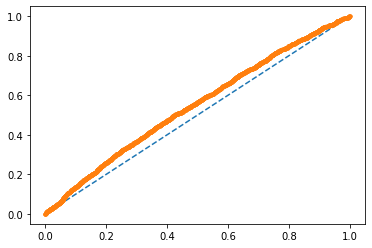

In [17]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

##### Dựa trên kết quả trên ta thấy precision và recall của class 1 đều rất thấp
##### ROC thấp
##### Dựa trên tất cả các đánh giá
##### => model chưa phù hợp có thể do mất cân bằng dữ liệu ???

## Resampling data

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [19]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

In [20]:
unique_elements, counts_elements = np.unique(y_resampled, return_counts=True)
print("Frequency of each category:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of each category:
[[   0    1]
 [6728 6728]]


In [21]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [22]:
#Create a Gaussian Classifier
model_r = GaussianNB()
# Train the model using the training sets
model_r.fit(X_train_r, y_train_r)

GaussianNB()

In [23]:
y_pred_r = model.predict(X_test_r)

In [24]:
confusion_matrix(y_test_r, y_pred_r)

array([[1636,   65],
       [1596,   67]], dtype=int64)

In [25]:
print(classification_report(y_test_r, y_pred_r))

              precision    recall  f1-score   support

           0       0.51      0.96      0.66      1701
           1       0.51      0.04      0.07      1663

    accuracy                           0.51      3364
   macro avg       0.51      0.50      0.37      3364
weighted avg       0.51      0.51      0.37      3364



In [26]:
y_prob_r = model.predict_proba(X_test_r)
y_prob_r

array([[7.03474687e-01, 2.96525313e-01],
       [9.10578135e-01, 8.94218651e-02],
       [9.50145867e-09, 9.99999990e-01],
       ...,
       [8.74787420e-01, 1.25212580e-01],
       [1.64622602e-02, 9.83537740e-01],
       [9.08993300e-01, 9.10067000e-02]])

In [27]:
roc_auc_score(y_test_r, y_prob_r[:, 1])

0.5480526293648497

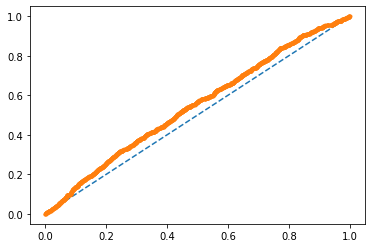

In [28]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_r, y_prob_r[:, 1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()